# <p style='text-align: center;'> Sentiment Analysis of Restaurant Reviews Using Machine Learning </p>


## Business Problem Understanding
The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, XGBoost (XGBClassifier), LightGBM (LGBMClassifier), K-Nearest Neighbors (KNNClassifier), Random Forest (RF), Logistic Regression (LR), and Support Vector Machine (SVM). In the end, we hope to find a "best" model for predicting the review's sentiment.

Dataset: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which consists of 1000 reviews on a restaurant.

To build a model to predict if review is positive or negative, following steps are performed.

- Importing Dataset


- Preprocessing Dataset


- Vectorization


- Training and Classification


- Analysis Conclusion

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
# Load the dataset.
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

In [3]:
# Display the first 5 rows of a DataFrame (df)
df.head()

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

In [4]:
# display the last 5 rows of a DataFrame (df)
df.tail()

Review  Liked
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

## Data Preprocessing and Visualization

In [5]:
# Let’s have a look at data dimensionality.
df.shape

(1000, 2)

In [6]:
# Let’s have a look at the column labels (column names).
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
# Check the duplicate records.
df.duplicated().sum()

4

In [8]:
# delete the duplicate records
df = df.drop_duplicates()

In [9]:
# Check the missing values records.
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [10]:
# Let's have a look at the general information about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  996 non-null    object
 1   Liked   996 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


In [11]:
# Let's have a look at the unique values found in the "Liked" column of a DataFrame 'df'.
df['Liked'].unique()

array([1, 0], dtype=int64)

In [12]:
# Let's have a look to count the occurrences of each unique value in the "Liked" column of a DataFrame 'df'.
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

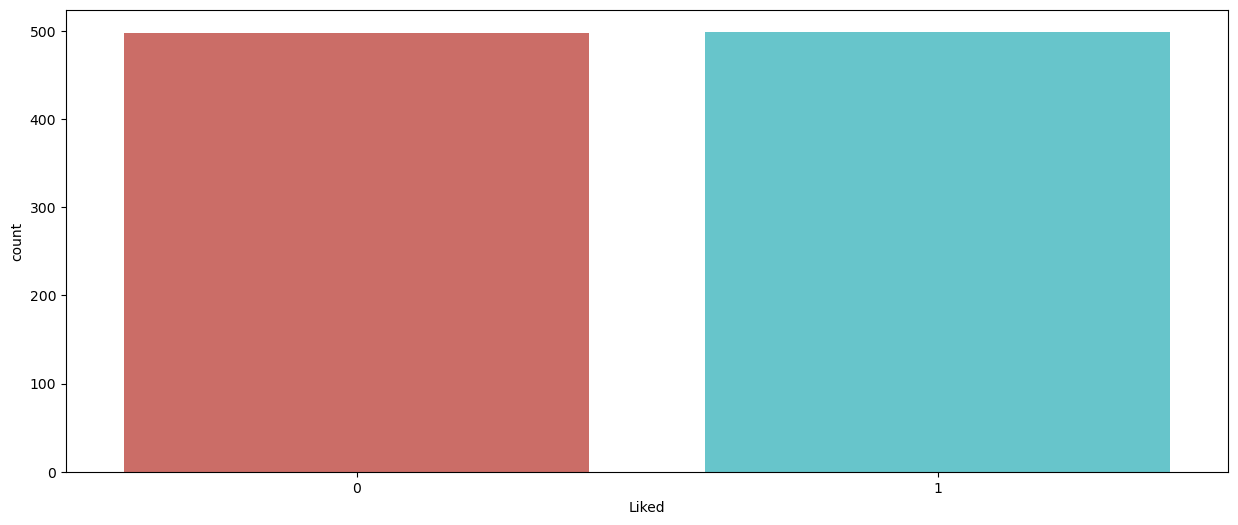

In [13]:
# Let's have a visualization to count the occurrences of each unique value in the "Liked" column of a DataFrame 'df'.
plt.figure(figsize=(15,6))
sns.countplot(df['Liked'], data = df, palette = 'hls')
plt.show()

In [14]:
# calculates the counts of each unique value in the "Liked" column of DataFrame 'df'.
balance_counts = df.groupby('Liked')['Liked'].agg('count').values
balance_counts

array([497, 499], dtype=int64)

In [15]:
# Import the libraries for ploty
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [16]:
# Visualization of dataset distribution by 'likes' using plotly 
fig = go.Figure()
fig.add_trace(go.Bar(
    x = [0],
    y=[balance_counts[0]],
    name='Like',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color= 'blue'
))
fig.add_trace(go.Bar(
    x= [1],
    y=[balance_counts[1]],
    name='Dislike',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color= 'red'
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by Likes</span>'
)
fig.show()

In [17]:
# Count the each word entry in the "Review" column and store in the new column named "Review_Length" to DataFrame 'df'
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split(' ')))

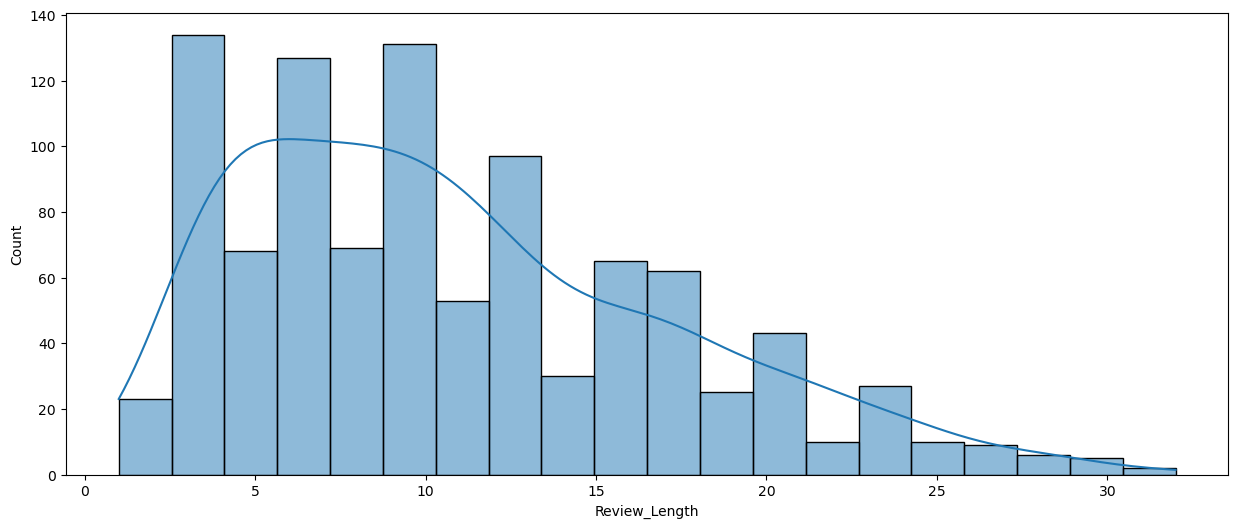

In [18]:
# Displays a histogram of word lengths in the "Review_Length" column of DataFrame 'df'.
plt.figure(figsize=(15,6))
sns.histplot(df['Review_Length'], bins = 20, kde = True, palette = 'hls')
plt.show()

In [19]:
# Visualise the data distribution of different fields

like_df = df[df['Liked'] == 0]['Review_Length'].value_counts().sort_index()
dislike_df = df[df['Liked'] == 1]['Review_Length'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=like_df.index,
    y=like_df.values,
    name= 0,
    fill='tozeroy',
    marker_color= 'blue',
))
fig.add_trace(go.Scatter(
    x=dislike_df.index,
    y=dislike_df.values,
    name=1,
    fill='tozeroy',
    marker_color= 'red',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Distribution in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

In [20]:
# Display the DataFrame 'df'
df

Review  Liked  Review_Length
0                             Wow... Loved this place.      1              4
1                                   Crust is not good.      0              4
2            Not tasty and the texture was just nasty.      0              8
3    Stopped by during the late May bank holiday of...      1             15
4    The selection on the menu was great and so wer...      1             12
..                                                 ...    ...            ...
995  I think food should have flavor and texture an...      0             12
996                           Appetite instantly gone.      0              3
997  Overall I was not impressed and would not go b...      0             10
998  The whole experience was underwhelming, and I ...      0             16
999  Then, as if I hadn't wasted enough of my life ...      0             28

[996 rows x 3 columns]

In [21]:
# Display the statistics description of the "Review_Length" column from DataFrame 'df'.
df.Review_Length.describe()

count    996.000000
mean      10.919679
std        6.256621
min        1.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       32.000000
Name: Review_Length, dtype: float64

In [22]:
# Copy of the original DataFrame 'df' as 'df_new'
df_new = df.copy()

In [23]:
# Display the DataFrame 'df_new'
df_new

Review  Liked  Review_Length
0                             Wow... Loved this place.      1              4
1                                   Crust is not good.      0              4
2            Not tasty and the texture was just nasty.      0              8
3    Stopped by during the late May bank holiday of...      1             15
4    The selection on the menu was great and so wer...      1             12
..                                                 ...    ...            ...
995  I think food should have flavor and texture an...      0             12
996                           Appetite instantly gone.      0              3
997  Overall I was not impressed and would not go b...      0             10
998  The whole experience was underwhelming, and I ...      0             16
999  Then, as if I hadn't wasted enough of my life ...      0             28

[996 rows x 3 columns]

In [24]:
# Converts all text entries in the "Review" column of the DataFrame 'df_new' to lowercase.
df_new['Review'] = df_new['Review'].str.lower()

In [25]:
#  imports the 'string' module in Python and retrieves the string containing all punctuation characters.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# Define a function to remove the punctuations from the 'Review' column.

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df_new['Review']= df_new['Review'].apply(lambda x:remove_punctuation(x))

In [27]:
# Define a tokenization function that splits a text into words using regular expressions.

import re

def tokenization(text):
    tokens = re.split(r'\W+', text)
    return ' '.join(tokens)

df_new['Review'] = df_new['Review'].apply(lambda x: tokenization(x))

In [28]:
# imports the 'NLTK' library in Python, accesses its stopwords corpus, and downloads the stopwords dataset.
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# Removing stopwords from the 'Review' column.

stop_words = set(stopwords.words('english'))

df_new['Review'] = df_new['Review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))

In [30]:
# Define a function that uses regular expressions to remove text within square brackets and words containing numbers.

def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()        # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()   # Remove words containing numbers
    return text.strip()

In [31]:
# Call the 'clean_text' function to the "Review" column of the DataFrame df_new.
df_new['Review'] = df_new.Review.apply(lambda x: clean_text(x))

In [32]:
# import the 'spaCy' library in Python and loads the English language model 'en_core_web_sm' for NLP tasks using spaCy.
import spacy
nlp = spacy.load('en_core_web_sm')

In [33]:
# Define a function that processes text by tokenizing and lemmatizing.

stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [34]:
# Call the 'lemmatizer' function to the "Review" column of the DataFrame df_new.
df_new['Review'] =  df_new.Review.apply(lambda x: lemmatizer(x))

In [35]:
# Display the DataFrame 'df_new'
df_new

Review  Liked  Review_Length
0                                       wow love place      1              4
1                                           crust good      0              4
2                                  tasty texture nasty      0              8
3    stop late bank holiday rick steve recommendati...      1             15
4                           selection menu great price      1             12
..                                                 ...    ...            ...
995                     think food flavor texture lack      0             12
996                              appetite instantly go      0              3
997                                  overall impressed      0             10
998    experience underwhelming think ninja sushi time      0             16
999  not waste life pour salt wound drawing time ta...      0             28

[996 rows x 3 columns]

In [36]:
# Define a function that uses a regular expression to remove URLs from text data and returns the text with URLs removed.
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [37]:
# Call the 'remove_urls' function to the "Review" column of the DataFrame df_new.
df_new['Review'] = df_new.Review.apply(lambda x: remove_urls(x))

In [38]:
# Define a function to remove digits (numeric characters) from text data and returns the text with digits removed.
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [39]:
# Call the 'remove_digits' function to the "Review" column of the DataFrame df_new.
df_new['Review'] = df_new.Review.apply(lambda x: remove_digits(x))

In [40]:
# Define a function to remove the extra spaces between words and remove any word that consists entirely of digits.

def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])  # Side effect: removes extra spaces
    return(clean_text)

In [41]:
# Call the 'remove_digits1' function to the "Review" column of the DataFrame df_new.
df_new['Review'] = df_new.Review.apply(lambda x: remove_digits1(x))

In [42]:
# Define a function to remove emojis from text data and returns the text with emojis removed.

def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [43]:
# Call the 'remove_emojis' function to the "Review" column of the DataFrame df_new.
df_new['Review'] = df_new.Review.apply(lambda x: remove_emojis(x))

In [44]:
# Display the DataFrame 'df_new'
df_new

Review  Liked  Review_Length
0                                       wow love place      1              4
1                                           crust good      0              4
2                                  tasty texture nasty      0              8
3    stop late bank holiday rick steve recommendati...      1             15
4                           selection menu great price      1             12
..                                                 ...    ...            ...
995                     think food flavor texture lack      0             12
996                              appetite instantly go      0              3
997                                  overall impressed      0             10
998    experience underwhelming think ninja sushi time      0             16
999  not waste life pour salt wound drawing time ta...      0             28

[996 rows x 3 columns]

In [45]:
#  imports necessary libraries for generating word cloud.
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [46]:
# Display the DataFrame 'df_new'
df_new

Review  Liked  Review_Length
0                                       wow love place      1              4
1                                           crust good      0              4
2                                  tasty texture nasty      0              8
3    stop late bank holiday rick steve recommendati...      1             15
4                           selection menu great price      1             12
..                                                 ...    ...            ...
995                     think food flavor texture lack      0             12
996                              appetite instantly go      0              3
997                                  overall impressed      0             10
998    experience underwhelming think ninja sushi time      0             16
999  not waste life pour salt wound drawing time ta...      0             28

[996 rows x 3 columns]

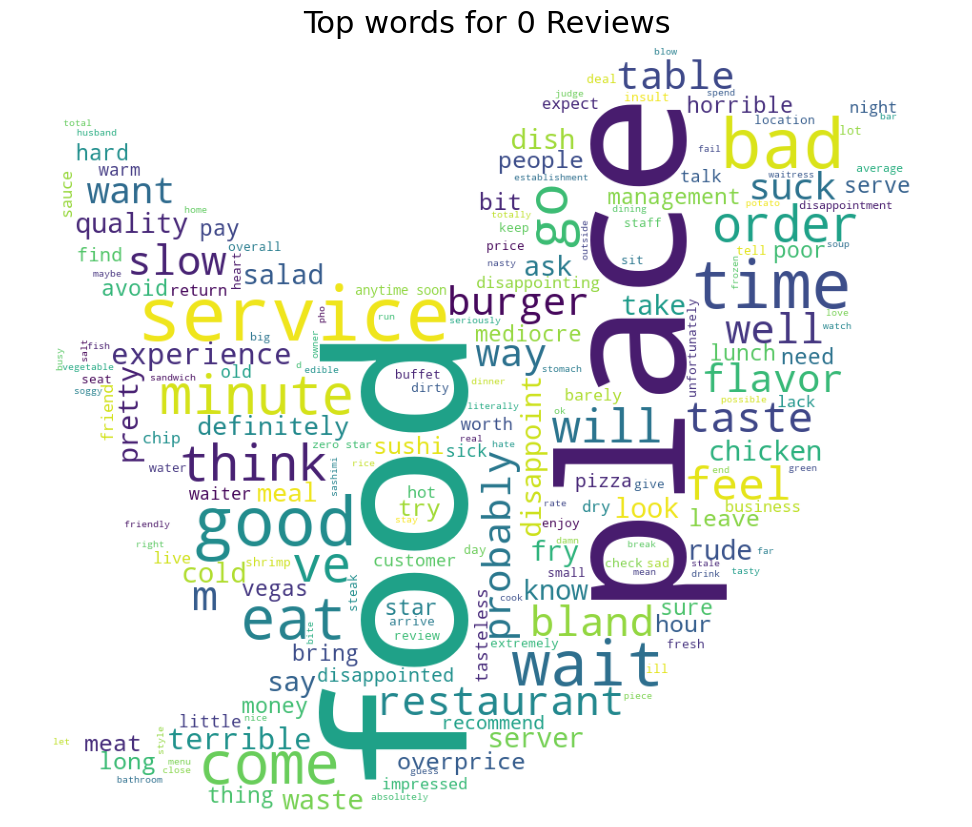

In [47]:
# Visualise the 'Top words for 0 Reviews' by WordCloud library with a custom Twitter logo-shaped mask.

twitter_mask = np.array(Image.open('twitter_mask2.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df_new.loc[df_new['Liked'] == 0, 'Review']))
plt.figure(figsize=(18,10))
plt.title('Top words for 0 Reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

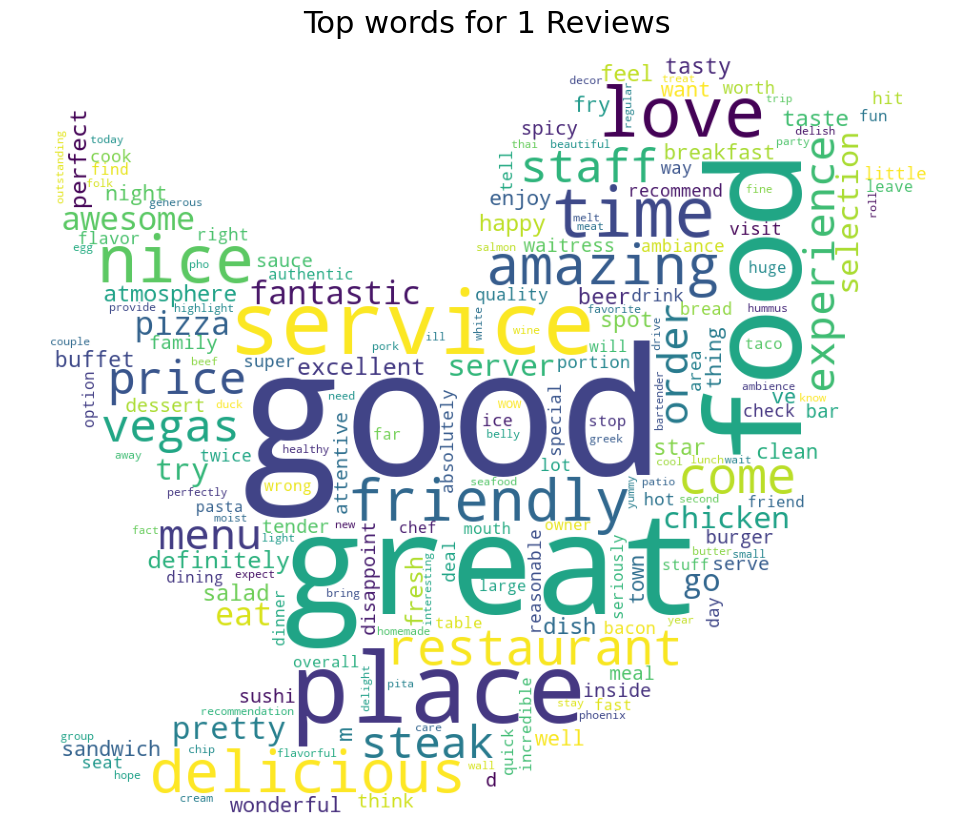

In [48]:
# Visualise the 'Top words for 1 Reviews' by WordCloud library with a custom Twitter logo-shaped mask.

twitter_mask = np.array(Image.open('twitter_mask2.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df_new.loc[df_new['Liked'] == 1, 'Review']))
plt.figure(figsize=(18,10))
plt.title('Top words for 1 Reviews', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

## Train/Test Split
<b> Creating independent variables ('Review') as "x" variable and dependent variable "Liked" as "y" variable.

In [49]:
# Create x and y variables.

x = df_new['Review']                     # Assign the 'Review' column from the DataFrame 'df_new' to the variable 'x'.
y = df_new['Liked']                      # Assign the 'Liked' column from the DataFrame 'df_new' to the variable 'y'.

print(len(x), len(y))                    # Print the lengths of both 'x' and 'y'

996 996


In [50]:
# import train_test_split from scikit-learn library.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# Display the length of the 'x_train', 'x_test', 'y_train' and 'y_test'.
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

747 747
249 249


## Modelling and Evaluation:
### Creating the PipeLines:
Creating Pipelines for Naive Bayes, XGBoost, LGBM, KNN, Random Forest, Logistic Regression, and SVM Models.
    
<b> PipeLine Steps which include:
    
1. Converts the text data into a numerical format by counting the frequency of words in each document using CountVectorizer.

2. Evaluate the importance of words in a document relative to a collection of documents using TfidfTransformer.

3. Training Respective Model's.

In [51]:
# import the necessary modules from scikit-learn (sklearn) for text feature extraction and pipeline construction.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

### 1. Naive Bayes Modelling and Evaluation

In [52]:
# imports the MultinomialNB (Multinomial Naive Bayes) classifier from scikit-learn's machine learning library.
from sklearn.naive_bayes import MultinomialNB

In [53]:
# create the ml pipeline for 'Naive Bayes' classifier.
NB_pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [54]:
# Train the model using training sets
NB_pipe.fit(x_train, y_train)

# Predict on the test dataset.
y_pred_class = NB_pipe.predict(x_test)

In [55]:
# import the metrics and evaluation functions from scikit-learn's library.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
# print the test accuracy
print(accuracy_score(y_test, y_pred_class))

0.7670682730923695


In [57]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[101  31]
 [ 27  90]]


In [58]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       132
           1       0.74      0.77      0.76       117

    accuracy                           0.77       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.77      0.77      0.77       249



### 2. XGBoost Classifier Modelling and Evaluation

In [59]:
# import the 'xgb' from 'xgboost' library.
import xgboost as xgb

# create the ml pipeline for 'XGBoost classifier'.
XGB_pipe = Pipeline([('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
    ))
])

In [60]:
# Train the model using training sets
XGB_pipe.fit(x_train, y_train)

# Predict on the test dataset.
y_pred_class = XGB_pipe.predict(x_test)

In [61]:
# print the test accuracy
print(accuracy_score(y_test, y_pred_class))

0.7269076305220884


In [62]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[114  18]
 [ 50  67]]


In [63]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       132
           1       0.79      0.57      0.66       117

    accuracy                           0.73       249
   macro avg       0.74      0.72      0.72       249
weighted avg       0.74      0.73      0.72       249



### 3. LGBM Classifier Modelling and Evaluation

In [64]:
# import the LGBMClassifier from lightgbm library.
from lightgbm import LGBMClassifier

# create the ml pipeline for 'LGBM classifier'.
LGBM_pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', LGBMClassifier())])

In [65]:
# Train the model using training sets
LGBM_pipe.fit(x_train, y_train)

# Predict on the test dataset.
y_pred_class = LGBM_pipe.predict(x_test)

In [66]:
# print the test accuracy
print(accuracy_score(y_test, y_pred_class))

0.6385542168674698


In [67]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[110  22]
 [ 68  49]]


In [68]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71       132
           1       0.69      0.42      0.52       117

    accuracy                           0.64       249
   macro avg       0.65      0.63      0.62       249
weighted avg       0.65      0.64      0.62       249



### 4. KNN Classifier Modelling and Evaluation

In [69]:
# import the 'KNeibghborsClassifier' from sklearn.neighbors library.
from sklearn.neighbors import KNeighborsClassifier

# create the ml pipeline for 'KNN classifier'.
KNN_pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', KNeighborsClassifier())])

In [70]:
# Train the model using training sets
KNN_pipe.fit(x_train, y_train)

# Predict on the test dataset.
y_pred_class = KNN_pipe.predict(x_test)

In [71]:
# print the test accuracy
print(accuracy_score(y_test, y_pred_class))

0.5742971887550201


In [72]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[130   2]
 [104  13]]


In [73]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       132
           1       0.87      0.11      0.20       117

    accuracy                           0.57       249
   macro avg       0.71      0.55      0.45       249
weighted avg       0.70      0.57      0.47       249



### 5. Random Forest Classifier Modelling and Evaluation

In [74]:
# import the 'RandomForestClassifier' from sklearn.ensemble library.
from sklearn.ensemble import RandomForestClassifier

# create the ml pipeline for 'RandomForestClassifier()'.
RF_pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', RandomForestClassifier())])

In [75]:
# Train the model using training sets
RF_pipe.fit(x_train, y_train)

# Predict on the test dataset.
y_pred_class = RF_pipe.predict(x_test)

In [76]:
# print the test accuracy
print(accuracy_score(y_test, y_pred_class))

0.7429718875502008


In [77]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[117  15]
 [ 49  68]]


In [78]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       132
           1       0.82      0.58      0.68       117

    accuracy                           0.74       249
   macro avg       0.76      0.73      0.73       249
weighted avg       0.76      0.74      0.74       249



### 6. Logistic Regression Modelling and Evaluation

In [79]:
# import the LogisticRegression from sklearn.linear_model library.
from sklearn.linear_model import LogisticRegression

# create the ml pipeline for 'LogisticRegression()'.
LR_pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', LogisticRegression())])

In [80]:
# Train the model using training sets
LR_pipe.fit(x_train, y_train)

# Predict on the test dataset.
y_pred_class = LR_pipe.predict(x_test)

In [81]:
# print the test accuracy
print(accuracy_score(y_test, y_pred_class))

0.7831325301204819


In [82]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[107  25]
 [ 29  88]]


In [83]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       132
           1       0.78      0.75      0.77       117

    accuracy                           0.78       249
   macro avg       0.78      0.78      0.78       249
weighted avg       0.78      0.78      0.78       249



### 7. SVM (Support Vector Machine) Modelling and Evaluation

In [84]:
# import the SVM from sklearn.svm library.
from sklearn.svm import SVC

# create the ml pipeline for 'SVC()'.
SVM_pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', SVC())])

In [85]:
# Train the model using training sets
SVM_pipe.fit(x_train, y_train)

# Predict on the test dataset.
y_pred_class = SVM_pipe.predict(x_test)

In [86]:
# print the test accuracy
print(accuracy_score(y_test, y_pred_class))

0.7871485943775101


In [87]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred_class))

[[112  20]
 [ 33  84]]


In [88]:
# print the classification report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       132
           1       0.81      0.72      0.76       117

    accuracy                           0.79       249
   macro avg       0.79      0.78      0.78       249
weighted avg       0.79      0.79      0.79       249



#### We have initialized the classifier models with their default parameters, now adding them to a model list with there names and initialize names.

In [89]:
# Adding the names and initialize_names(models) to list.
models = [('NaiveBayes', NB_pipe),
          ('XGBClassifier', XGB_pipe),
          ('LGBMClassifier', LGBM_pipe),
          ('KNNlassifier', KNN_pipe),
          ('RF', RF_pipe),
          ('LR', LR_pipe),
          ('SVMClassifier', SVM_pipe)]

In [90]:
# import the 'cross_val_score'
from sklearn.model_selection import cross_val_score

names = []                                                     # Initializing empty list of classifier names
Test_scores = []                                               # Initializing empty list of Test Accuracy
CV_Scores = []                                                 # Initializing empty list of CV Score

for name, model in models:                                     # Using for loop for iteration of name and models
    model.fit(x_train, y_train)                                # fitting the models with train data
    test_predictions = model.predict(x_test)                   # Predict on the test data set.
    
    Test_scores.append(accuracy_score(y_test, test_predictions))       # Adding test scores to Test_Score list
    CV_Scores.append(cross_val_score(model, x, y, cv=5).mean())        # Adding CV Score to CV_Score list
    names.append(name)                                                 # Adding classifier names to names list
    
# Creating DataFrame with classifier names, train scores, test scores and cv score    
tr_split = pd.DataFrame({'Name': names, 'Test_Score':Test_scores, 'CV_Score':CV_Scores})
print(tr_split)  

             Name  Test_Score  CV_Score
0      NaiveBayes    0.767068  0.769055
1   XGBClassifier    0.726908  0.735975
2  LGBMClassifier    0.638554  0.660623
3    KNNlassifier    0.574297  0.565261
4              RF    0.738956  0.764095
5              LR    0.783133  0.796191
6   SVMClassifier    0.787149  0.780126


### Analysis and Conclusion

After comparing various machine learning algorithms, including Naive Bayes, XGBoost (XGBClassifier), LightGBM (LGBMClassifier), K-Nearest Neighbors (KNNClassifier), Random Forest (RF), Logistic Regression (LR), and Support Vector Machine (SVM), we observed that the Logistic Regression (LR) algorithm yielded the highest test accuracy and cross-validation score. Specifically, the Logistic Regression model achieved a test accuracy of 78% and a cross-validation score of 79%. Therefore, based on these performance metrics, we have selected Logistic Regression as the best-performing model for our task.